In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Perceptron

Perceptron é um classificador binário linear e representa um neurônio, a estrutura básica de uma rede neural. No perceptron, recebe-se os atributos de entrada da base de treinamento (e.g. as entradas de uma porta lógica AND/OR) e multiplica, cada uma delas, por um peso W, conforme Figura 1. Feito isso, os valores resultantes são somados e passam por uma função de ativação.
Nesse notebook, todos os passos para implementação do perceptron serão feitos utilizando Numpy, para isso, 5 etapas deverão ser feitas:
1. Inicializaçao dos pesos e bias
2. Implementando funções de ativação
3. Calculando a saída do neurônio
4. Predição
5. Treino e avaliação

![alt text](imgs/perceptron.jpg "Title")

### Parte 1 - Inicialização dos pesos e bias

Ao implementar um perceptron, o primeiro passo é iniciar os pesos em um intervalo pequeno, como [-0.5,0.5] aleatoriamente. O bias quando necessário também deve ser inicializado nessa etapa.

Para implementar essa etapa, voçê deve utilizar a função weight_init(num_inputs). Dica: você pode utilizar a [função random do numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html)

In [3]:
def weight_init(num_inputs): 
    """
    Funcao que inicializa os pesos e bias aleatoriamente utilizando numpy
    Parametro: num_inputs - quantidade de entradas X
    Retorna: w,b - pesos e bias da rede inicializados
    """
    ### Insira seu código aqui (~2 linhas)
    w = np.random.random((num_inputs))
    b = -0.1
    return w, b

# test
w, b = weight_init(10)
print("w: " + str(w))
print("b: " + str(b))

w: [0.27122333 0.56513091 0.24401206 0.17750054 0.47948265 0.05057883
 0.30271898 0.07135345 0.87679336 0.46075505]
b: -0.1


### Parte 2 - Implementação das funções de ativação
As funções de ativação definem o intervalo de valores que a saída do neurônio poderá ter. Para redes neurais tradicionais, utiliza-se as funções degrau e sigmoid. Redes neurais profundas podem utilizar as funções ReLU, LeakyReLU e Tangente Hiperbólica para evitar problemas no gradiente.

Nsse Notebook, as quatro funções de ativação devem ser implementadas, para verificar a corretude das mesmas, a função visualizeActivationFunc exibe os gráficos correspondentes, as funçoes, suas respectivas saídas e gráfico deverão ser similares ao exposto abaixo: (Dica: utilize a [função exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) do numpy)
* Degrau: saída 0 se menor que 0 e saída 1 caso contrário
$$ \begin{equation}
  degrau =\begin{cases}
    1, & \text{se $x>0$}.\\
    0, & \text{caso contrário}.
  \end{cases}
\end{equation} $$
![alt text](imgs/degrau.png "Title")
* Sigmoid: saída entre [0,1]
$$ \begin{equation}
  sigmoid = \frac{1}{1 + e^{-z}}
\end{equation} $$
![alt text](imgs/sigmoid.png "Title")
* Retificadora (Relu): saída 0 caso entrada seja negativa e maior que 1 caso contrário
$$ \begin{equation}
  relu = max(0,x)
\end{equation} $$
![alt text](imgs/relu.png "Title")
* Tangente Hiperbólica: saída entre [-1,1]
$$ \begin{equation}
  tanh = \frac{2}{(1+e^{-2*z})} - 1
\end{equation} $$
![alt text](imgs/tanh.png "Title")

In [5]:
def activation_func(func_type, z):
    """
    Funcao que implementa as funcoes de ativacao mais comuns
    Parametros: func_type - uma string que contem a funcao de ativacao desejada
                z - vetor com os valores de entrada X multiplicado pelos pesos
    Retorna: saida da funcao de ativacao
    """
    z = np.asarray(z)
    # Seu codigo aqui (~2 linhas)
    if func_type == 'sigmoid':
        return 1 / (1 + np.exp(-z))
    elif func_type == 'tanh':
        return (2 / (1 + np.exp(-2 * z))) - 1
    elif func_type == 'relu':
        return np.maximum(0, z)
    elif func_type == 'degrau':
        return 1 * (z > 0)


# test
p = [x/10.0 for x in range(-20, 21)]
print("\nSIGMOID\n" + str(activation_func('sigmoid', p)))
print("\nSOLO SIGMOID\n" + str(activation_func('sigmoid', p[0])))
print("\nTANH\n" + str(activation_func('tanh', p)))
print("\nSOLO TANH\n" + str(activation_func('tanh', p[0])))
print("\nRELU\n" + str(activation_func('relu', p)))
print("\nSOLO RELU\n" + str(activation_func('relu', p[0])))
print("\nDEGRAU\n" + str(activation_func('degrau', p)))
print("\nSOLO DEGRAU\n" + str(activation_func('degrau', 0.1)))


SIGMOID
[0.11920292 0.13010847 0.14185106 0.15446527 0.16798161 0.18242552
 0.19781611 0.21416502 0.23147522 0.24973989 0.26894142 0.2890505
 0.31002552 0.33181223 0.35434369 0.37754067 0.40131234 0.42555748
 0.450166   0.47502081 0.5        0.52497919 0.549834   0.57444252
 0.59868766 0.62245933 0.64565631 0.66818777 0.68997448 0.7109495
 0.73105858 0.75026011 0.76852478 0.78583498 0.80218389 0.81757448
 0.83201839 0.84553473 0.85814894 0.86989153 0.88079708]

SOLO SIGMOID
0.11920292202211755

TANH
[-0.96402758 -0.95623746 -0.94680601 -0.93540907 -0.92166855 -0.90514825
 -0.88535165 -0.86172316 -0.83365461 -0.80049902 -0.76159416 -0.71629787
 -0.66403677 -0.60436778 -0.53704957 -0.46211716 -0.37994896 -0.29131261
 -0.19737532 -0.09966799  0.          0.09966799  0.19737532  0.29131261
  0.37994896  0.46211716  0.53704957  0.60436778  0.66403677  0.71629787
  0.76159416  0.80049902  0.83365461  0.86172316  0.88535165  0.90514825
  0.92166855  0.93540907  0.94680601  0.95623746  0.9640

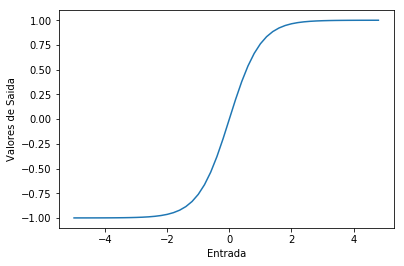

In [7]:
def visualizeActivationFunc(z):
    func = []
    for i in range(len(z)):
        func.append(activation_func('tanh', z[i]))

    plt.plot(z,func)
    plt.xlabel('Entrada')
    plt.ylabel('Valores de Saida')
    plt.show()

z = np.arange(-5., 5., 0.2)
visualizeActivationFunc(z)

### Parte 3 - Cálculo da saída do neurônio¶

Com os pesos, bias inicializados e a função de ativação implementada, calcula-se a saída através da equação:

 $$ \begin{equation}
  Z = W*X + b
\end{equation} $$
Feito isso, a saída final é calculada a partir da função de ativação escolhida. Para implementar essa função, você pode utilizar a [função dot do numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) para multiplicar

In [8]:
def forward(w,b,X):
    """
    Funcao que implementa a etapa forward propagate do neurnio
    Parametros: w - pesos
                b - bias
                X - entradas
    """
    ### Seu codigo aqui (~2 linhas)
    z = np.dot(w, X) + b
    return activation_func('sigmoid', z)

### Parte 4 - Predição
De posse da saída, deve-se avaliar o sucesso da mesma definindo-se um limiar. Para problemas binários, pode-se estabelecer o limiar em 0.5, de forma que abaixo disso a saída é 0 e 1 caso contrário.

In [29]:
def predict(out):
    """
    Funcao que aplica um limiar na saida
    Parametro: y - saida do neuronio
    """
    ### Seu codigo aqui (~1 linha)
    return 1 * (out >= 0.5)

### Parte 5 - Treino e Avaliação

Durante o treinamento, a saída é calculada pela função propagate n vezes, onde n é a quantidade de interações do algoritmo. Na primeira interação, os pesos possuem valores pré-definidos pela função de inicialização e são aleatórios após essa interação, as próximas calculam o peso baseado em um erro, calculado a partir da equação:

 $$ \begin{equation}
  erro = y - ypred
\end{equation} $$

Onde y é a saída original do conjunto de dados e y_pred as saidas calculadas. Dado o erro, os pesos são atualizados a partir da equação:

$$ \begin{equation}
  w += erro*taxa-de-aprendizado*X
\end{equation} $$

 
Onde X é o conjunto de entrada e a taxa de aprendizagem é um parâmetro de otimização que possui seus valorse variando entre [0,1]. Recomenda-se o uso de taxas de aprendizagem medianas para problemas com redes neurais tradicionais simples (como 0.2-0.5) e taxas de aprendizagem menores para redes neurais profundas (acima de 0.02).

In [9]:
def perceptron(x,y, num_interaction, learning_rate):
    """
    Funcao que implementa o loop do treinamento 
    Parâmetros: x - entrada da rede 
                y - rotulos/labels
                num_interaction - quantidade de interacoes desejada para a rede convergir
                learning_rate - taxa de aprendizado para calculo do erro
    """
    #Passo 1 - Inicie os pesos e bias (~1 linha)
    w, b = weight_init(x.shape[0])
    #Passo 2 - Loop por X interacoes
    for j in range(None):
        # Passo 3 -  calcule a saida do neuronio (~1 linha)
        y_pred = forward(w, b, x)
        # Passo 4 - calcule o erro entre a saida obtida e a saida desejada nos rotulos/labels (~1 linha)
        erro = y - y_pred
        # Passo 5 - Atualize o valor dos pesos (~1 linha)
        # Dica: voce pode utilizar a funcao np.dot e a funcao transpose de numpy 
        w += np.dot(erro*learning_rate, x.T)
        
    # Verifique as saídas
    print('Saída obtida:', y_pred)
    print('Pesos obtidos:', w)

    #Métricas de Avaliação
    y_pred = predict(y_pred)
    print('Matriz de Confusão:')
    print(confusion_matrix(y, y_pred))
    print('F1 Score:')
    print(classification_report(y, y_pred))